### ウェザーデータを獲得する

In [82]:
#必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('weather_raw.csv', encoding='cp932', skiprows=1)
df.head(10)

,Unnamed: 0,東京,東京.1,東京.2,東京.3,東京.4,東京.5,東京.6,東京.7,東京.8,...,東京.36,東京.37,東京.38,東京.39,東京.40,東京.41,東京.42,東京.43,東京.44,東京.45
0,年月日,平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),平均気温(℃),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),...,平均湿度(％),平均湿度(％),平均雲量(10分比),平均雲量(10分比),平均雲量(10分比),平均雲量(10分比),平均雲量(10分比),天気概況(夜：18時～翌日06時),天気概況(夜：18時～翌日06時),天気概況(夜：18時～翌日06時)
1,NaN,NaN,NaN,NaN,平年値からの差(℃),平年値からの差(℃),NaN,NaN,NaN,NaN,...,平年値からの差(％),平年値からの差(％),NaN,NaN,NaN,平年値からの差(10分比),平年値からの差(10分比),NaN,NaN,NaN
2,NaN,NaN,品質情報,均質番号,NaN,品質情報,NaN,現象なし情報,品質情報,均質番号,...,NaN,品質情報,NaN,品質情報,均質番号,NaN,品質情報,NaN,品質情報,均質番号
3,2024/4/1,14.6,8,1,+2.9,8,3.0,0,8,1,...,NaN,0,6.0,8,1,-0.4,8,快晴,8,1
4,2024/4/2,14.2,8,1,+2.3,8,0,1,8,1,...,NaN,0,5.0,8,1,-1.4,8,曇,8,1
5,2024/4/3,13.9,8,1,+1.8,8,11.5,0,8,1,...,NaN,0,10.0,8,1,+3.6,8,雨時々曇,8,1
6,2024/4/4,15.4,8,1,+3.1,8,4.0,0,8,1,...,NaN,0,10.0,8,1,+3.6,8,曇後一時雨,8,1
7,2024/4/5,11.4,8,1,-1.1,8,0.5,0,8,1,...,NaN,0,10.0,8,1,+3.6,8,曇時々雨,8,1
8,2024/4/6,12.7,8,1,0.0,8,0.0,0,8,1,...,NaN,0,10.0,8,1,+3.5,8,曇時々雨,8,1
9,2024/4/7,17.0,8,1,+4.1,8,1.5,0,8,1,...,NaN,0,7.8,8,1,+1.3,8,曇,8,1


In [ ]:
# 找到需要删除的列索引
df = pd.read_csv('weather_raw.csv', encoding='cp932', skiprows=1)
drop_cols = [i for i, col in enumerate(df.iloc[2]) if "品質情報" in str(col) or "均質番号" in str(col) or "現象なし情報" in str(col)]
drop_cols

In [79]:
# 重新读取数据并删除这些列
df = pd.read_csv('weather_raw.csv', encoding='cp932', skiprows=1)
drop_cols = [i for i, col in enumerate(df.iloc[2]) if "品質情報" in str(col) or "均質番号" in str(col) or "現象なし情報" in str(col)]
df = df.drop(df.columns[drop_cols], axis=1).reset_index(drop=True)
# 将第0行作为列名，并删除前几行
df.columns = df.iloc[0]
df = df.drop(df.index[0:3]).reset_index(drop=True)
# 只保留你想要的列（删除第3,5,7,9,13,14列，索引从0开始）
keep_indices = [i for i in range(len(df.columns)) if i not in [2,4,6,8]]
df = df.iloc[:, keep_indices]
df = df.dropna(axis=1, how='all')  # 删除全为空的列
df.head(10)

,年月日,平均気温(℃),降水量の合計(mm),日照時間(時間),合計全天日射量(MJ/㎡),降雪量合計(cm),平均風速(m/s),平均湿度(％),平均雲量(10分比),平均雲量(10分比),天気概況(夜：18時～翌日06時)
0,2024/4/1,14.6,3.0,3.8,14.85,0,2.8,73,6.0,-0.4,快晴
1,2024/4/2,14.2,0,10.6,22.30,0,3.0,50,5.0,-1.4,曇
2,2024/4/3,13.9,11.5,0.0,4.58,0,1.6,83,10.0,+3.6,雨時々曇
3,2024/4/4,15.4,4.0,0.1,9.27,0,2.0,79,10.0,+3.6,曇後一時雨
4,2024/4/5,11.4,0.5,0.0,2.97,0,2.8,71,10.0,+3.6,曇時々雨
5,2024/4/6,12.7,0.0,0.0,8.84,0,1.8,81,10.0,+3.5,曇時々雨
6,2024/4/7,17.0,1.5,8.2,20.12,0,2.1,83,7.8,+1.3,曇
7,2024/4/8,18.8,0.0,2.3,12.90,0,2.0,85,10.0,+3.5,曇時々雨
8,2024/4/9,15.6,55.5,0.0,2.41,0,4.4,78,9.3,+2.7,曇一時晴
9,2024/4/10,11.7,0,11.9,26.41,0,3.2,47,2.8,-3.8,晴一時薄曇


In [80]:
new_df = df

In [81]:
new_df

,年月日,平均気温(℃),降水量の合計(mm),日照時間(時間),合計全天日射量(MJ/㎡),降雪量合計(cm),平均風速(m/s),平均湿度(％),平均雲量(10分比),平均雲量(10分比),天気概況(夜：18時～翌日06時)
0,2024/4/1,14.6,3.0,3.8,14.85,0,2.8,73,6.0,-0.4,快晴
1,2024/4/2,14.2,0,10.6,22.30,0,3.0,50,5.0,-1.4,曇
2,2024/4/3,13.9,11.5,0.0,4.58,0,1.6,83,10.0,+3.6,雨時々曇
3,2024/4/4,15.4,4.0,0.1,9.27,0,2.0,79,10.0,+3.6,曇後一時雨
4,2024/4/5,11.4,0.5,0.0,2.97,0,2.8,71,10.0,+3.6,曇時々雨
...,...,...,...,...,...,...,...,...,...,...,...
360,2025/3/27,17.9,0,5.6,17.49,0,3.8,69,10.0,+3.5,曇
361,2025/3/28,19.9,2.5,4.1,14.41,0,4.2,79,10.0,+3.5,雨時々曇一時晴
362,2025/3/29,7.6,12.5,0.0,2.51,0,3.1,90,10.0,+3.5,曇時々雨
363,2025/3/30,9.4,0.5,6.1,19.13,0,2.2,63,8.3,+1.9,曇時々雨


C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:11: UserWarning: Glyph 28201 (\N{CJK 

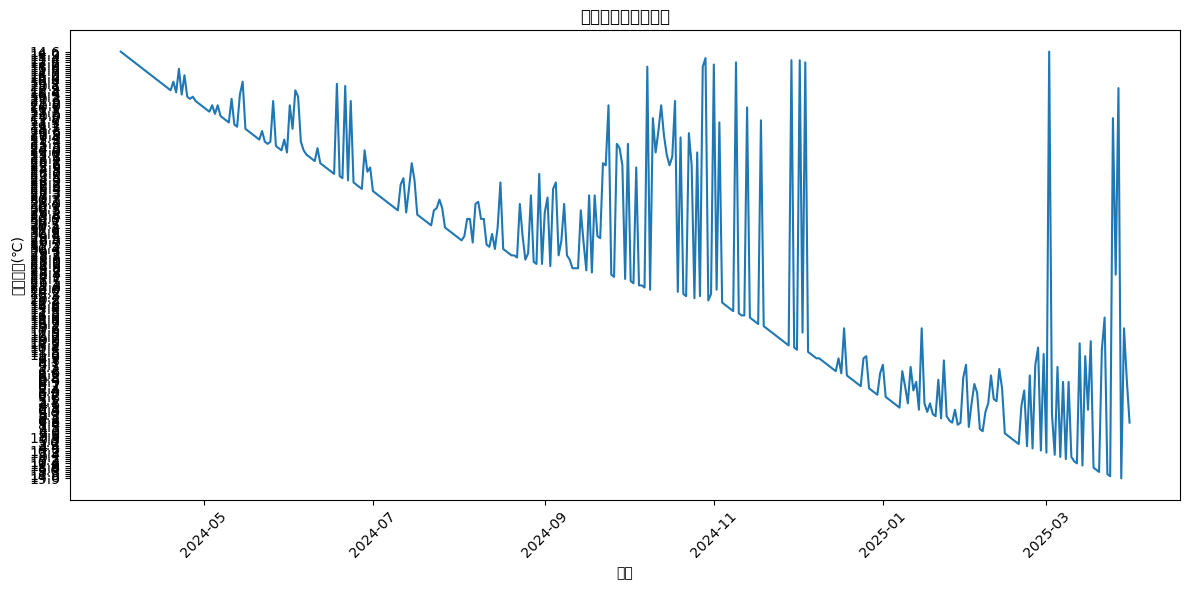

C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:22: UserWarning: Glyph 12398 (\N{HIRA

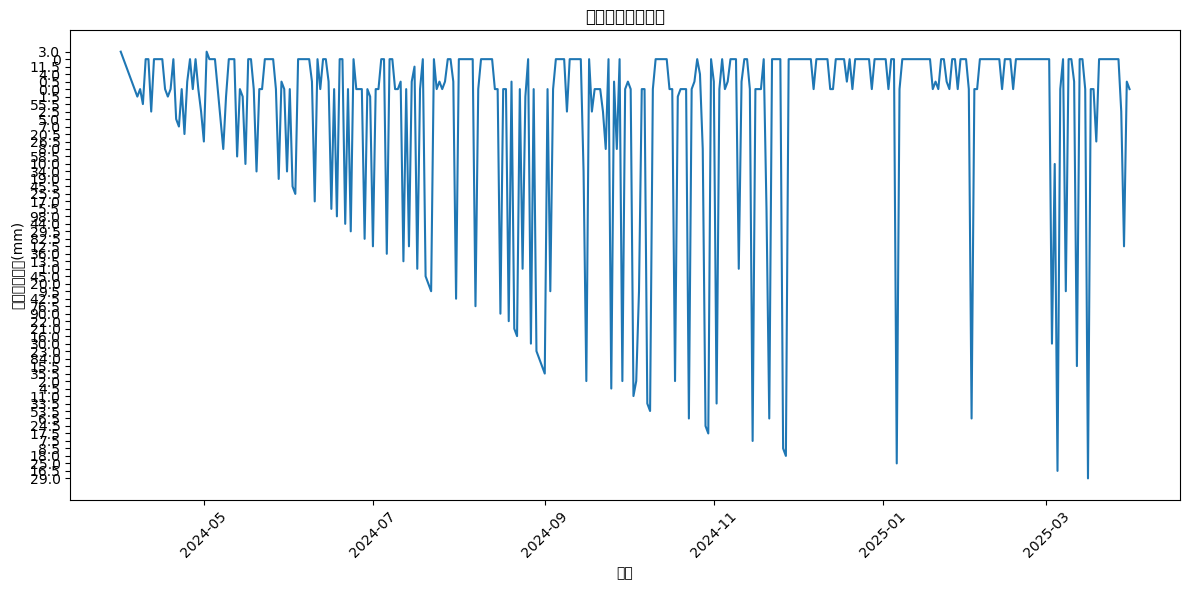

C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 29031 (\N{CJK UNIFIED IDEOGRAPH-7167}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_6468\1990486077.py:34: UserWarning: Glyph 21029 (\N{CJK 

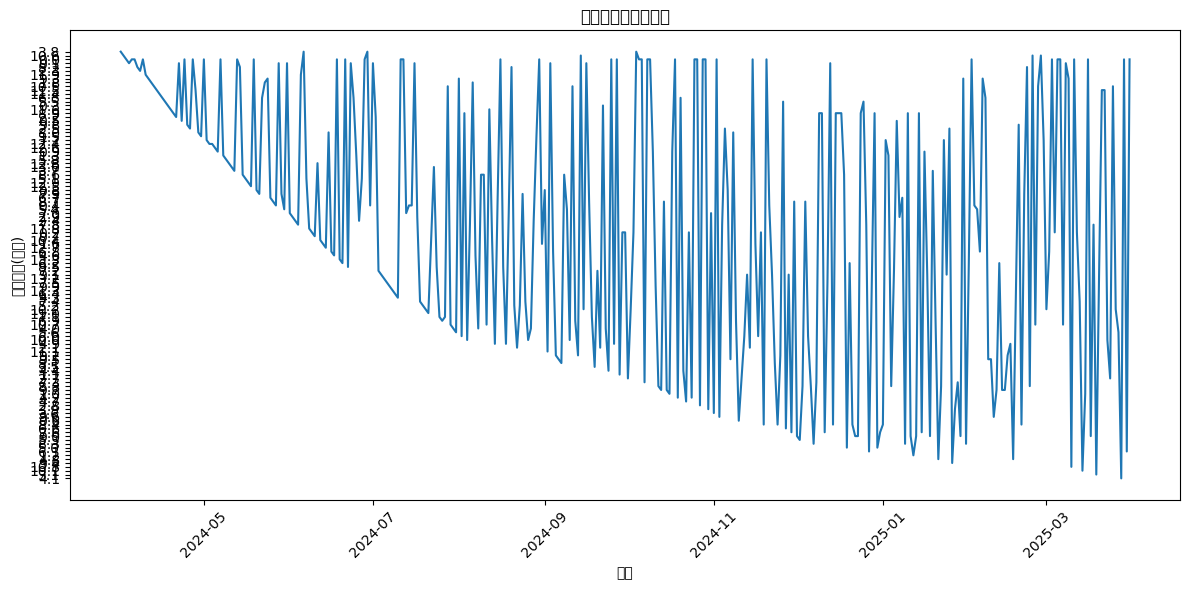

In [83]:
# 确保日期列为datetime类型
new_df['年月日'] = pd.to_datetime(new_df['年月日'], errors='coerce')

# 平均气温折线图（假设第2列为平均气温）
plt.figure(figsize=(12,6))
sns.lineplot(x='年月日', y=new_df.columns[1], data=new_df)
plt.title('日別平均気温の推移')
plt.xlabel('日付')
plt.ylabel(new_df.columns[1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 降水量折线图（如有）
if '降水量の合計(mm)' in new_df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(x='年月日', y='降水量の合計(mm)', data=new_df)
    plt.title('日別降水量の推移')
    plt.xlabel('日付')
    plt.ylabel('降水量の合計(mm)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 日照时间折线图（如有）
sun_cols = [col for col in new_df.columns if '日照時間' in col]
if sun_cols:
    plt.figure(figsize=(12,6))
    sns.lineplot(x='年月日', y=sun_cols[0], data=new_df)
    plt.title('日別日照時間の推移')
    plt.xlabel('日付')
    plt.ylabel(sun_cols[0])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()